1. Ramadhani Reza Saeputra (22.11.5266)
2. Firza Findia Jiven (22.11.5276)
3. Mohammad Fa'iq Ruliff Mustafa (22.11.5297)


##**Klasifikasi Menggunakan Algoritma XGBoost**




In [ ]:
!pip install scikit-learn==1.5.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold

#XGBoost
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE  # SMOTE for oversampling

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/post_natal_data.csv")

df.head(10)

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
5,6/14/2022 20:06,30-35,No,No,Yes,Yes,Yes,Yes,No,No,Yes
6,6/14/2022 20:06,40-45,No,Yes,No,No,No,Yes,No,No,Yes
7,6/14/2022 20:07,35-40,Yes,No,Yes,Yes,No,Yes,No,No,No
8,6/14/2022 20:07,35-40,Yes,Yes,No,Yes,No,No,No,No,Yes
9,6/14/2022 20:11,30-35,Sometimes,Yes,Two or more days a week,No,Yes,Yes,No,Sometimes,Not interested to say


####**Pre-Processing Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [ ]:
df.drop('Timestamp', axis=1, inplace=True)

df.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [ ]:
len(df)

1503

In [ ]:
df.describe()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,5,3,3,3,3,3,2,3,3,3
top,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,364,536,555,640,583,841,980,624,557,709


In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                                           Total   Percent
Problems concentrating or making decision     12  0.007984
Feeling of guilt                               9  0.005988
Irritable towards baby & partner               6  0.003992
Age                                            0  0.000000
Feeling sad or Tearful                         0  0.000000
Trouble sleeping at night                      0  0.000000
Overeating or loss of appetite                 0  0.000000
Feeling anxious                                0  0.000000
Problems of bonding with baby                  0  0.000000
Suicide attempt                                0  0.000000


In [ ]:
df = df.dropna() #dihapus karna tidak melebihi 2% data yang kosong

df.isnull().sum()

,0
Age,0
Feeling sad or Tearful,0
Irritable towards baby & partner,0
Trouble sleeping at night,0
Problems concentrating or making decision,0
Overeating or loss of appetite,0
Feeling anxious,0
Feeling of guilt,0
Problems of bonding with baby,0
Suicide attempt,0


In [ ]:
len(df)

1491

####**Encoding Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = [
    'Feeling sad or Tearful',
    'Irritable towards baby & partner',
    'Trouble sleeping at night',
    'Problems concentrating or making decision',
    'Overeating or loss of appetite',
    'Feeling anxious',
    'Feeling of guilt',
    'Problems of bonding with baby',
    'Suicide attempt'
]

label_encoders = {}
data = df.copy()

for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data.head(5)

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,2,2,1,2,2,1,1,2,2
1,40-45,2,0,0,2,2,0,2,2,0
2,35-40,2,0,2,2,2,1,1,1,0
3,35-40,2,2,2,2,0,1,0,0,0
4,40-45,2,0,1,2,0,1,1,2,0


In [ ]:
description = {}

for column in columns_to_encode:
    label_counts = data[column].value_counts().sort_index().to_dict()
    label_mapping = {index: label for index, label in enumerate(label_encoders[column].classes_)}
    description[column] = {"Label Mapping": label_mapping, "Counts": label_counts}

description

{'Feeling sad or Tearful': {'Label Mapping': {0: 'No',
   1: 'Sometimes',
   2: 'Yes'},
  'Counts': {0: 521, 1: 443, 2: 527}},
 'Irritable towards baby & partner': {'Label Mapping': {0: 'No',
   1: 'Sometimes',
   2: 'Yes'},
  'Counts': {0: 499, 1: 443, 2: 549}},
 'Trouble sleeping at night': {'Label Mapping': {0: 'No',
   1: 'Two or more days a week',
   2: 'Yes'},
  'Counts': {0: 415, 1: 637, 2: 439}},
 'Problems concentrating or making decision': {'Label Mapping': {0: 'No',
   1: 'Often',
   2: 'Yes'},
  'Counts': {0: 583, 1: 473, 2: 435}},
 'Overeating or loss of appetite': {'Label Mapping': {0: 'No',
   1: 'Not at all',
   2: 'Yes'},
  'Counts': {0: 835, 1: 316, 2: 340}},
 'Feeling anxious': {'Label Mapping': {0: 'No', 1: 'Yes'},
  'Counts': {0: 523, 1: 968}},
 'Feeling of guilt': {'Label Mapping': {0: 'Maybe', 1: 'No', 2: 'Yes'},
  'Counts': {0: 528, 1: 621, 2: 342}},
 'Problems of bonding with baby': {'Label Mapping': {0: 'No',
   1: 'Sometimes',
   2: 'Yes'},
  'Counts': {0: 55

In [ ]:
age_mapping = {'25-30': 0,
               '30-35': 1,
               '35-40': 2,
               '40-45': 3,
               '45-50': 4
               }

# Daripada memetakan secara langsung dan berpotensi memperkenalkan NaN,
# isi NaN dengan placeholder, misalnya, 0, jika ada setelah pemetaan
data['Age'] = data['Age'].map(age_mapping).fillna(0)

# Pastikan X tidak mengandung nilai NaN apa pun sebelum menerapkan SMOTE
X = data.drop(columns=['Feeling anxious']).fillna(0).values  # Replace NaNs with 0

In [ ]:
data.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2,2,2,1,2,2,1,1,2,2
1,3,2,0,0,2,2,0,2,2,0
2,2,2,0,2,2,2,1,1,1,0
3,2,2,2,2,2,0,1,0,0,0
4,3,2,0,1,2,0,1,1,2,0


####**Exploratory Data**

In [ ]:
data.describe()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000
mean,2.134138,1.004024,1.033535,1.016097,0.900738,0.668008,0.649229,0.875252,0.895372,0.832327
std,1.289392,0.838653,0.837992,0.756898,0.820586,0.823588,0.477372,0.753870,0.792447,0.864700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000


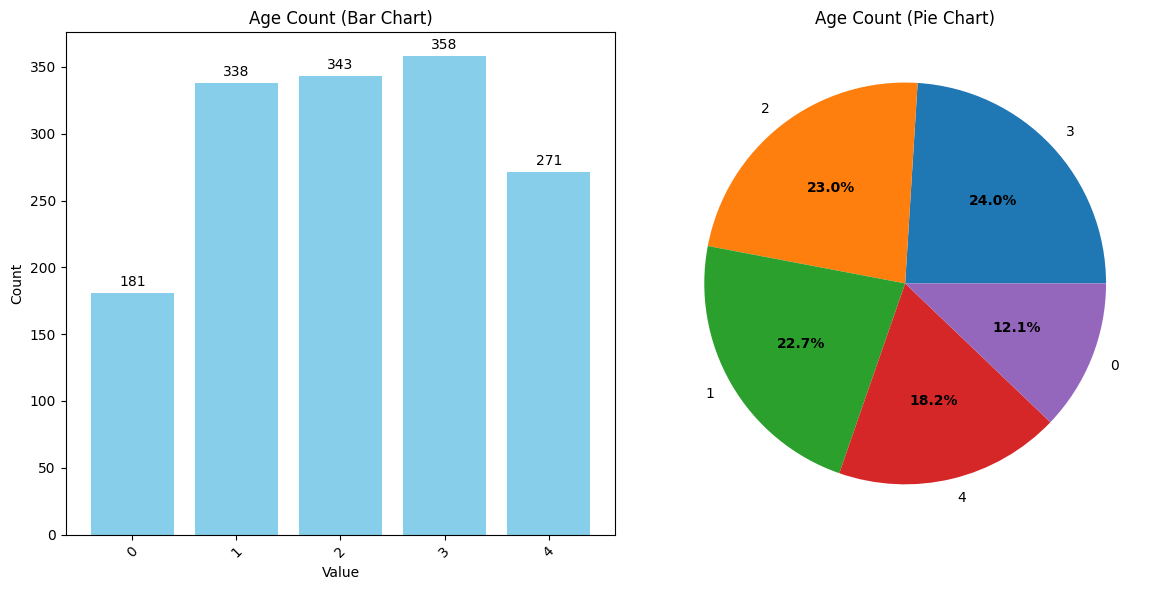

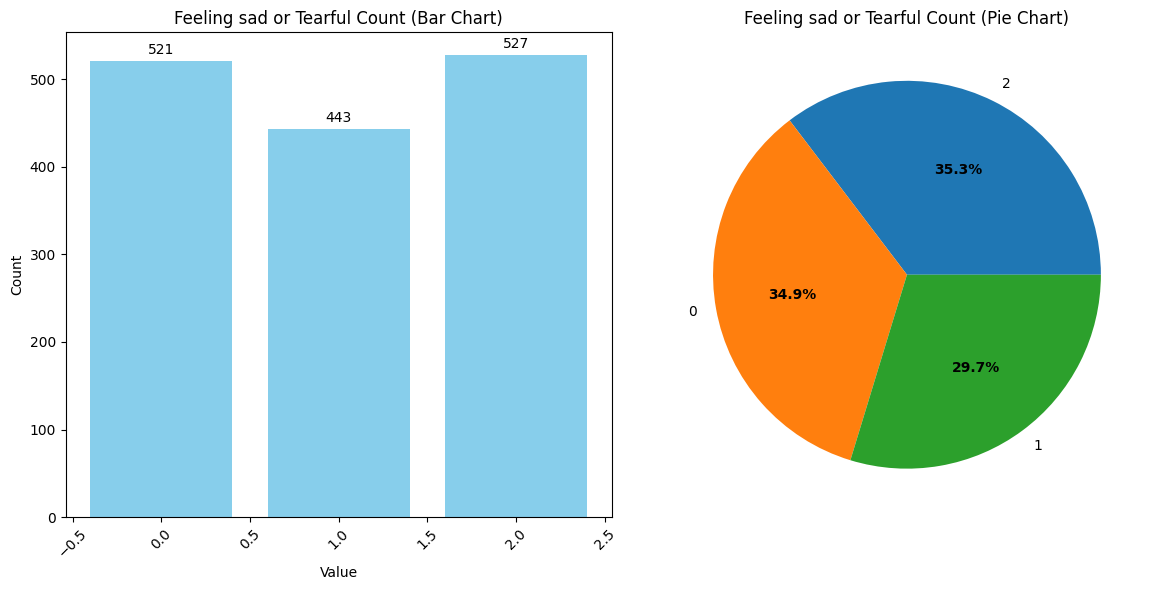

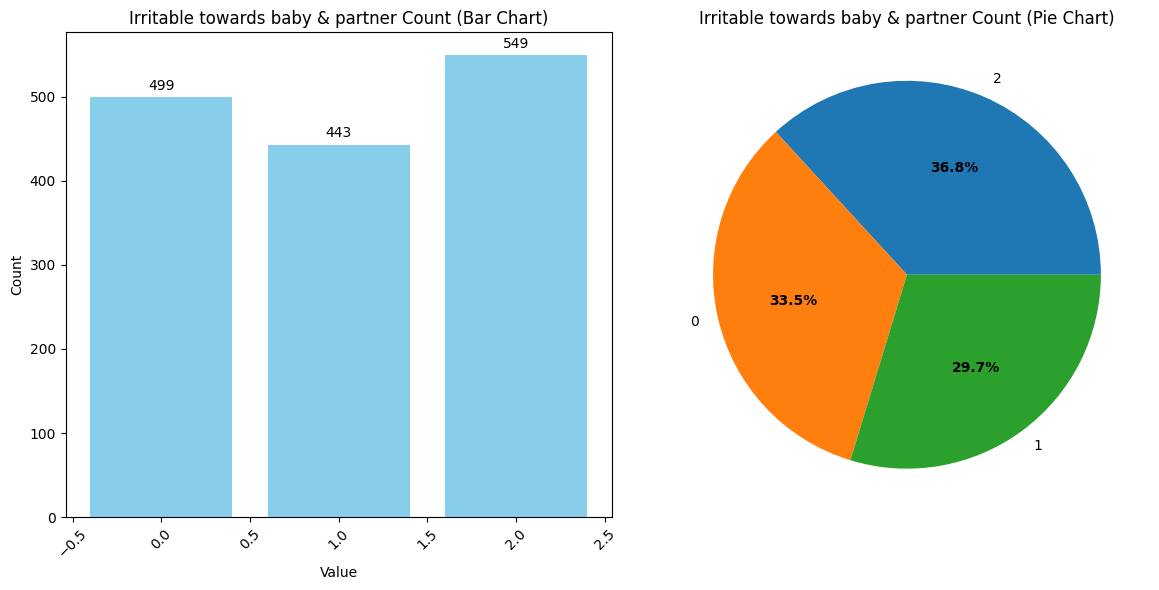

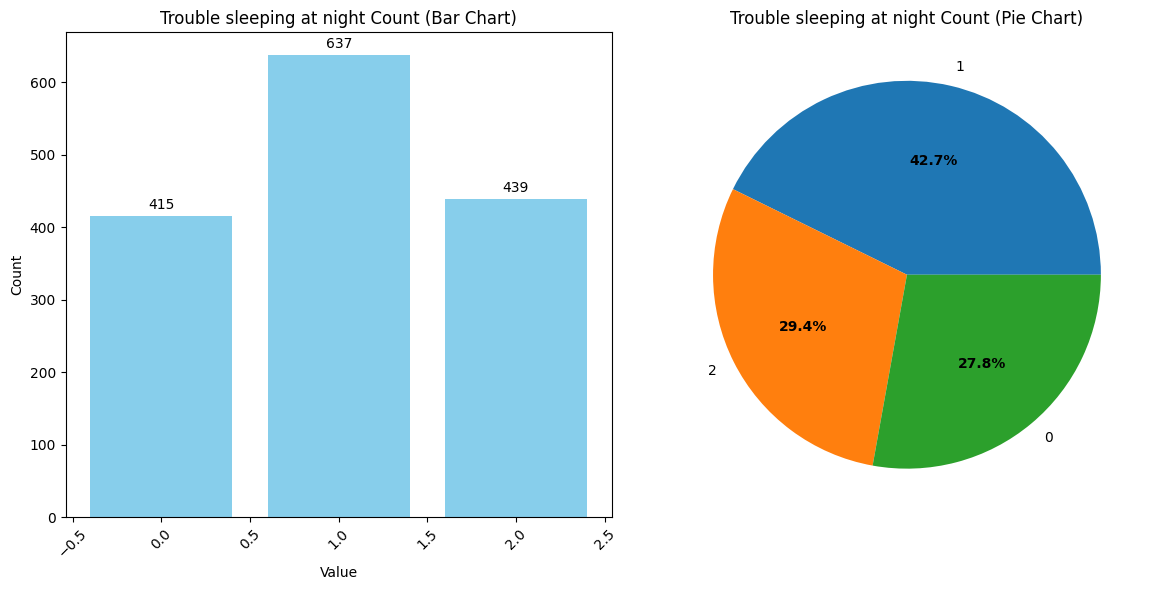

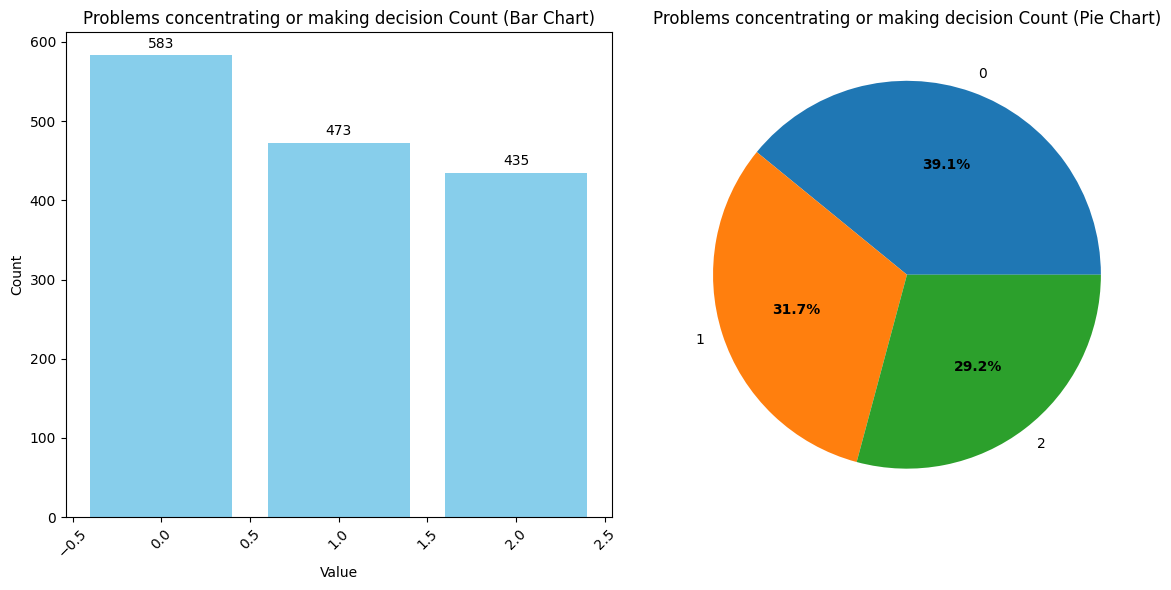

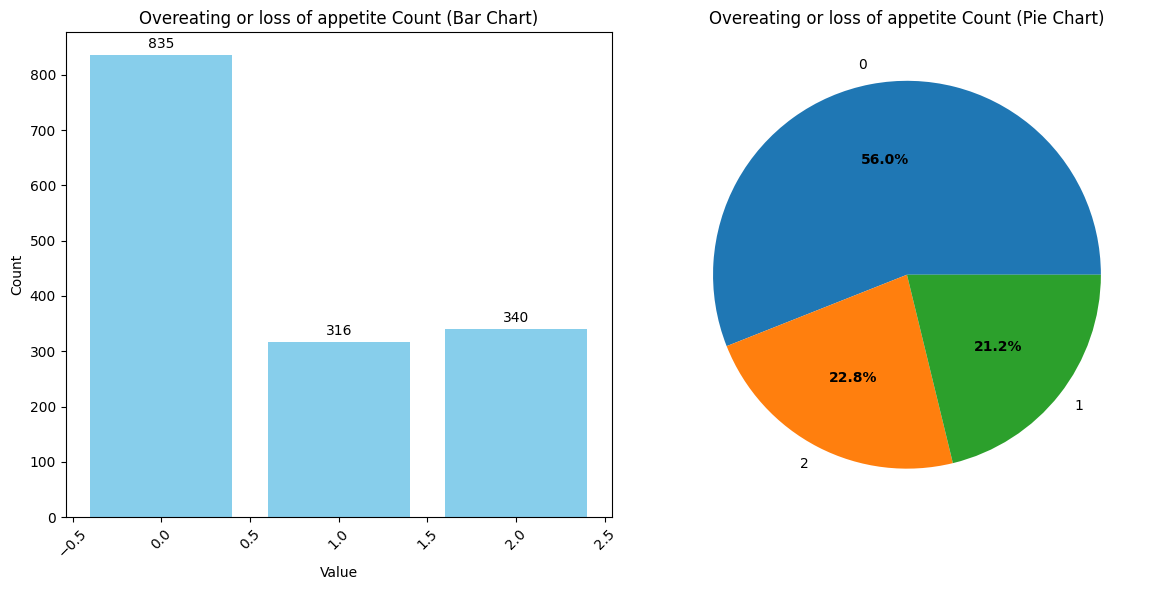

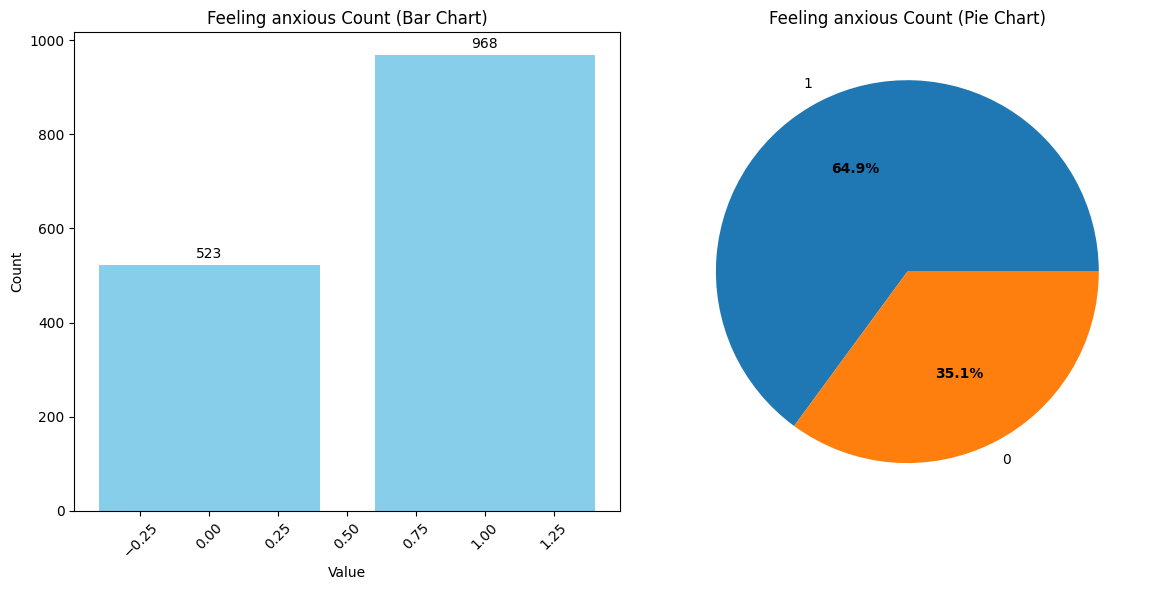

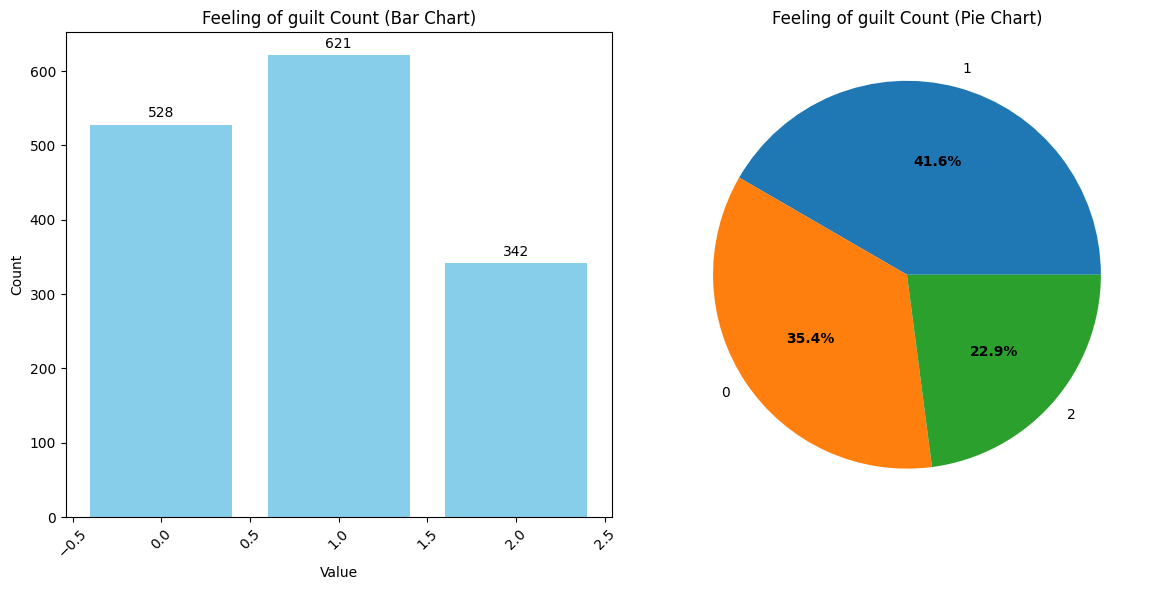

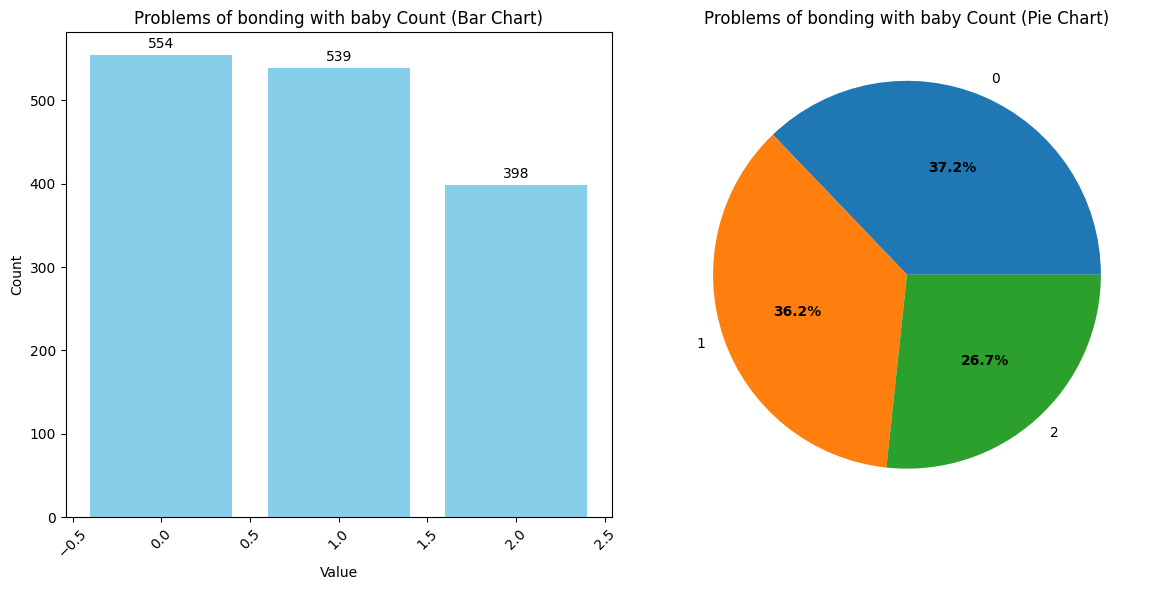

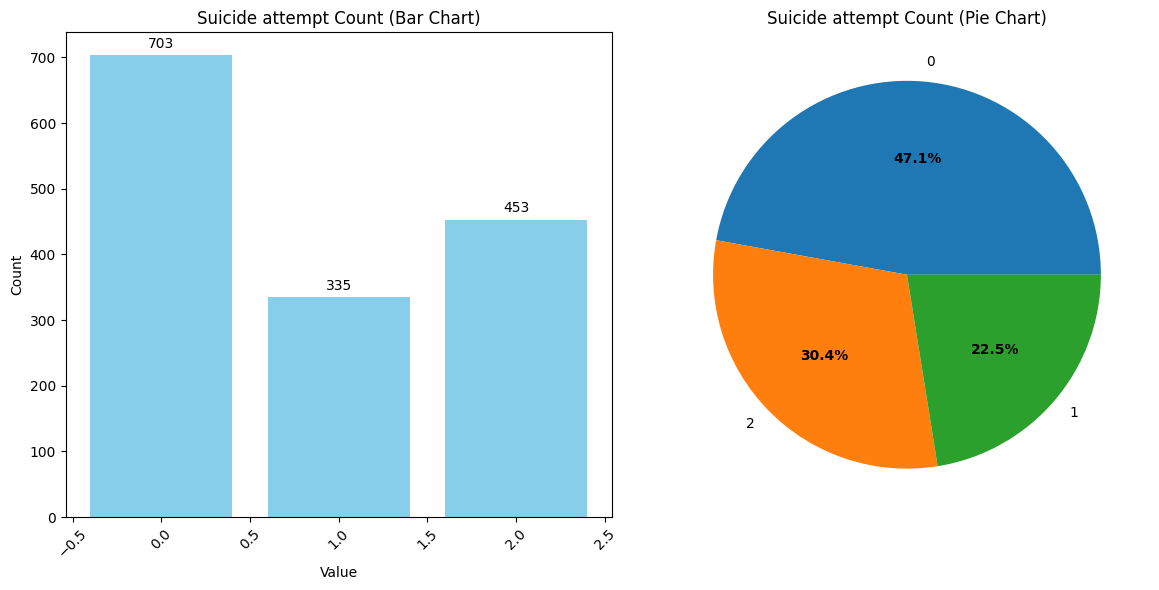

In [ ]:
cols = data.columns

for col in cols:
    counts = data[col].value_counts()
    percentages = data[col].value_counts(normalize=True) * 100

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Bar chart
    bars = axs[0].bar(counts.index, counts.values, color='skyblue')
    axs[0].set_title(f'{col} Count (Bar Chart)')
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Count')
    axs[0].tick_params(axis='x', rotation=45)

    for bar in bars:
        height = bar.get_height()
        axs[0].annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Pie chart
    wedges, texts, autotexts = axs[1].pie(counts, labels=counts.index.map(str), autopct='%1.1f%%')
    axs[1].set_title(f'{col} Count (Pie Chart)')

    plt.setp(autotexts, size=10, weight="bold")

    plt.tight_layout()
    plt.show()
    print()


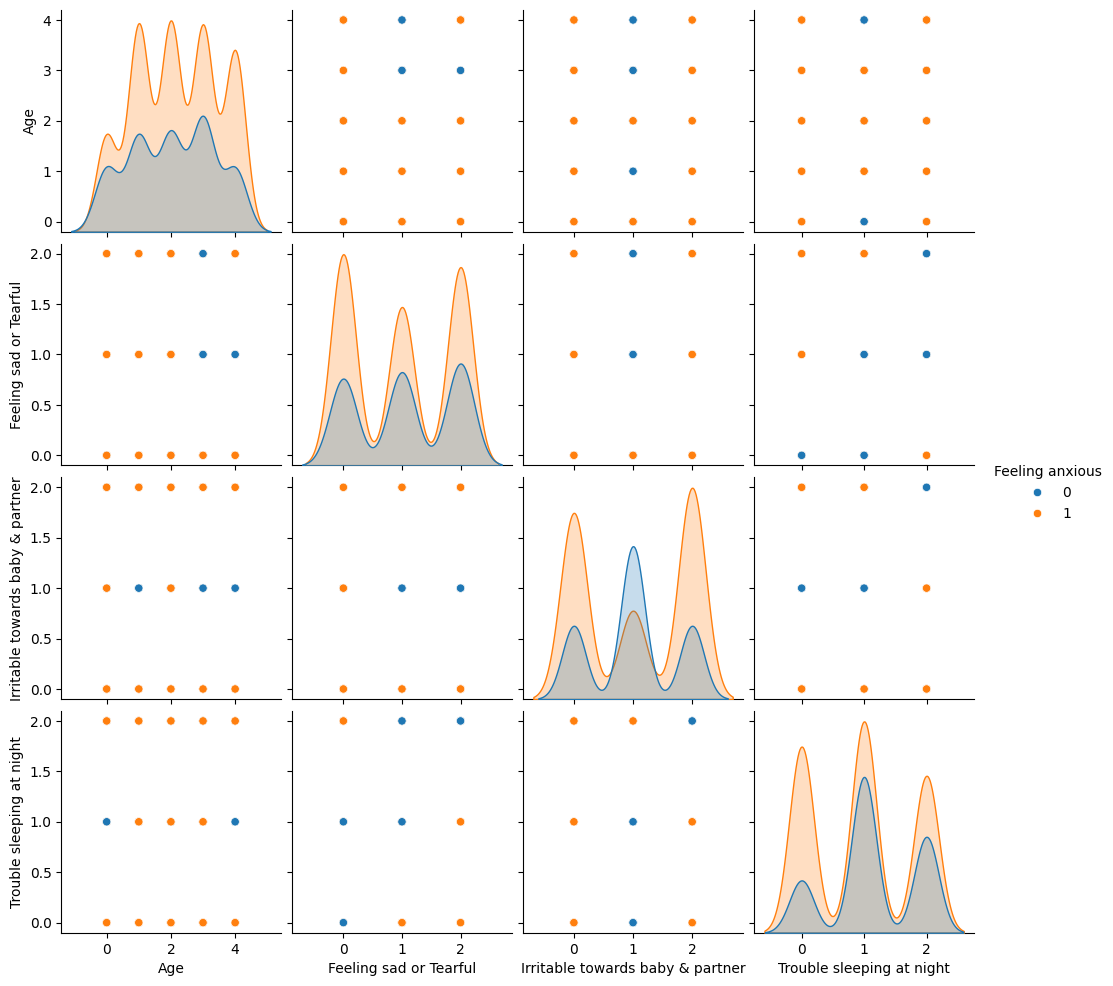

In [ ]:
# Pairplot untuk memvisualisasikan hubungan antara beberapa fitur
sns.pairplot(data, vars=['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night'], hue='Feeling anxious')  # Example features, adjust as needed
plt.show()

Highly correlated features:


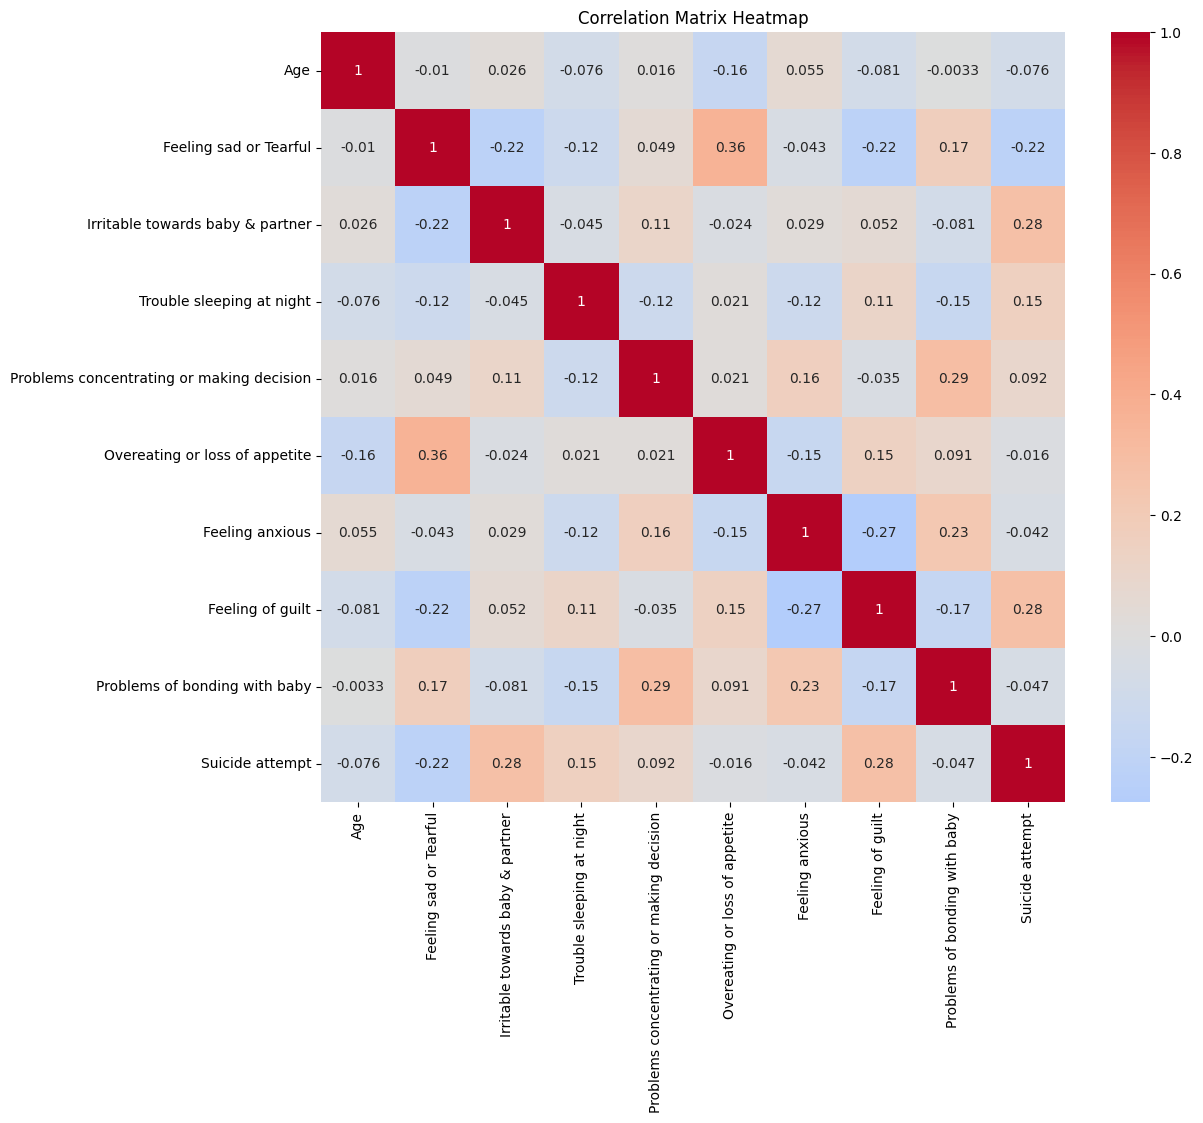

In [ ]:
# Hitung matriks korelasi
correlation_matrix = data.corr()

# Tetapkan ambang batas untuk korelasi yang kuat (misalnya, 0,7 atau lebih tinggi)
threshold = 0.7

# Temukan fitur yang sangat berkorelasi
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Cetak fitur yang sangat berkorelasi
print("Highly correlated features:")

# Visualisasi matriks korelasi (opsional)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

###**Balancing Dataset Smote**

In [ ]:
# Hitung jumlah data 0 dan 1
counts = data['Feeling anxious'].value_counts()

# Tampilkan hasilnya
print("Jumlah data 0 (Tidak Cemas):", counts[0])
print("Jumlah data 1 (Cemas):", counts[1])

Jumlah data 0 (Tidak Cemas): 523
Jumlah data 1 (Cemas): 968


Distribusi data sebelum SMOTE:
Feeling anxious
1    764
0    428
Name: count, dtype: int64

Distribusi data setelah SMOTE:
Feeling anxious
0    764
1    764
Name: count, dtype: int64


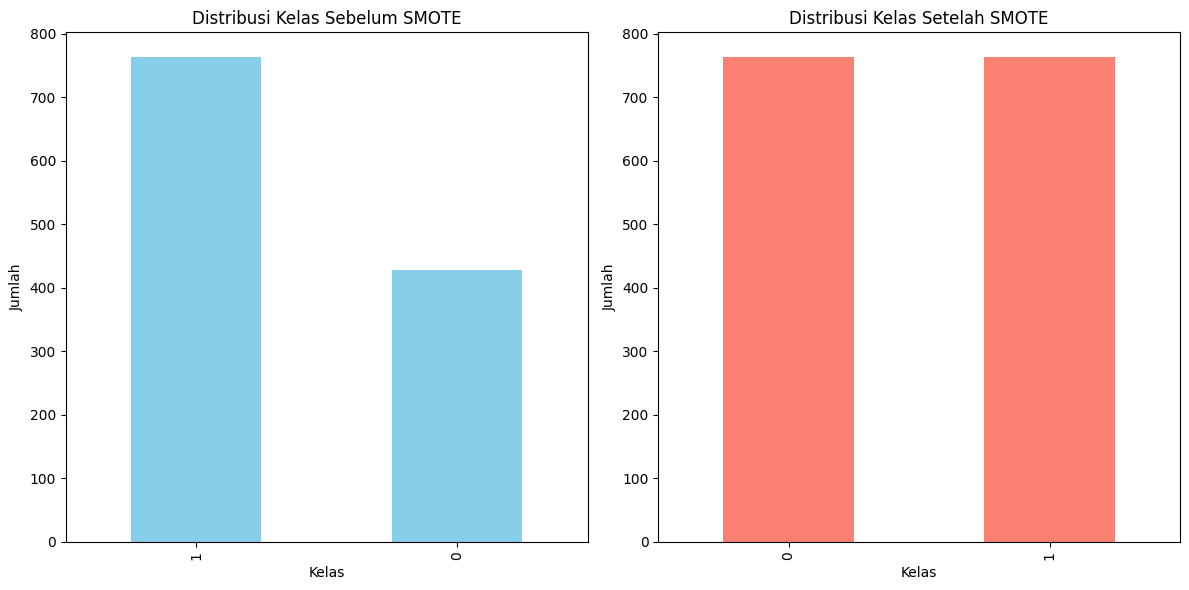

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = data.drop('Feeling anxious', axis=1)
y = data['Feeling anxious']

# Membagi data menjadi data latih dan data uji (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan distribusi sebelum oversampling
print("Distribusi data sebelum SMOTE:")
print(y_train.value_counts())

# Inisialisasi SMOTE untuk oversampling
smote = SMOTE(random_state=42)

# Terapkan SMOTE untuk menghasilkan data latih yang seimbang
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi setelah oversampling
print("\nDistribusi data setelah SMOTE:")
print(y_train_resampled.value_counts())

# Optional: Visualisasi distribusi kelas sebelum dan sesudah SMOTE (bila perlu)
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas sebelum dan sesudah SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
y_train_resampled.value_counts().plot(kind='bar', color='salmon')
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Setelah SMOTE, data latih telah di-oversample dan menjadi seimbang
# Kita dapat langsung membagi kembali data menjadi data latih dan data uji

# Split data latih dan uji dengan rasio 80% latih, 20% uji
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Menampilkan bentuk data setelah split
print(f"Dimensi X_train_final: {len(X_train_final)}")
print(f"Dimensi X_test_final: {len(X_test_final)}")
print(f"Distribusi kelas pada data latih setelah SMOTE:\n{y_train_final.value_counts()}")
print(f"Distribusi kelas pada data uji:\n{y_test_final.value_counts()}")


Dimensi X_train_final: 1222
Dimensi X_test_final: 306
Distribusi kelas pada data latih setelah SMOTE:
Feeling anxious
0    614
1    608
Name: count, dtype: int64
Distribusi kelas pada data uji:
Feeling anxious
1    156
0    150
Name: count, dtype: int64


###**Klasifikasi dan Evaluasi, XGBoost**

Mencari parameter terbaik untuk pelatihan model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Menggunakan data yang sudah di-resample dengan SMOTE (X_train_final, y_train_final)
# dan data uji (X_test_final, y_test_final)

# Tentukan parameter grid untuk pencarian terbaik
param_grid = {
    'eta': [0.1, 0.2, 0.3, 0.4, 0.5],  # Learning rate
    'max_depth': [3, 5, 7],   # Depth pohon keputusan
    'n_estimators': [50, 100, 150],  # Jumlah pohon
    'subsample': [0.7, 0.8, 1.0],  # Proporsi data untuk setiap pohon
    'colsample_bytree': [0.7, 0.8, 1.0],  # Proporsi fitur untuk setiap pohon
    'gamma': [0, 0.1, 0.2]  # Regularisasi untuk mencegah overfitting
}

# Inisialisasi model XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Menggunakan GridSearchCV untuk mencari kombinasi parameter terbaik
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Melakukan fitting untuk mencari parameter terbaik
grid_search.fit(X_train_final, y_train_final)

# Menampilkan parameter terbaik dan skor terbaik
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Menggunakan parameter terbaik untuk membuat model akhir
best_model = grid_search.best_estimator_

# Evaluasi pada data uji
y_pred = best_model.predict(X_test_final)
accuracy = accuracy_score(y_test_final, y_pred)
print(f"Accuracy on test data: {accuracy:.4f}")


Fitting 3 folds for each of 1215 candidates, totalling 3645 fits
Best parameters found: {'colsample_bytree': 0.8, 'eta': 0.2, 'gamma': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score: 0.9631770808241397
Accuracy on test data: 0.9477


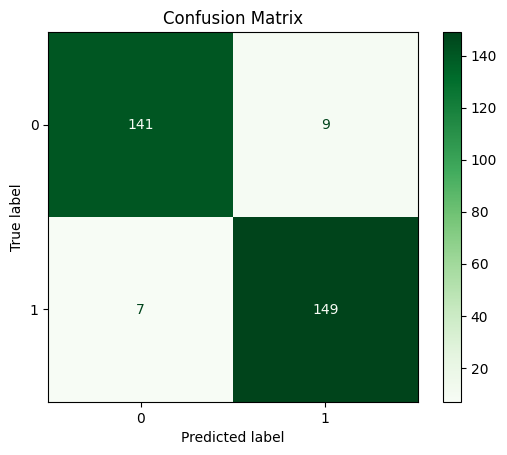

Classification Report:
                       precision    recall  f1-score   support

Class 0 (Not Anxious)       0.95      0.94      0.95       150
    Class 1 (Anxious)       0.94      0.96      0.95       156

             accuracy                           0.95       306
            macro avg       0.95      0.95      0.95       306
         weighted avg       0.95      0.95      0.95       306



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Recalculate y_pred using the best_model and X_test_final
y_pred = best_model.predict(X_test_final)  # This line is crucial

# Menghitung confusion matrix
cm = confusion_matrix(y_test_final, y_pred)

# Menampilkan confusion matrix dengan visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.show()

# Menampilkan laporan klasifikasi
report = classification_report(y_test_final, y_pred, target_names=['Class 0 (Not Anxious)', 'Class 1 (Anxious)'])
print("Classification Report:")
print(report)

Trial 1/10
Accuracy: 0.9754, Precision: 0.9819, Recall: 0.9784, F1: 0.9802, ROC-AUC: 0.9930

Trial 2/10
Accuracy: 0.9866, Precision: 0.9928, Recall: 0.9856, F1: 0.9892, ROC-AUC: 0.9917

Trial 3/10
Accuracy: 0.9821, Precision: 0.9800, Recall: 0.9932, F1: 0.9866, ROC-AUC: 0.9888

Trial 4/10
Accuracy: 0.9821, Precision: 0.9863, Recall: 0.9863, F1: 0.9863, ROC-AUC: 0.9973

Trial 5/10
Accuracy: 0.9821, Precision: 0.9897, Recall: 0.9829, F1: 0.9863, ROC-AUC: 0.9931

Trial 6/10
Accuracy: 0.9754, Precision: 0.9743, Recall: 0.9902, F1: 0.9822, ROC-AUC: 0.9885

Trial 7/10
Accuracy: 0.9732, Precision: 0.9672, Recall: 0.9933, F1: 0.9801, ROC-AUC: 0.9907

Trial 8/10
Accuracy: 0.9710, Precision: 0.9726, Recall: 0.9827, F1: 0.9776, ROC-AUC: 0.9915

Trial 9/10
Accuracy: 0.9777, Precision: 0.9793, Recall: 0.9861, F1: 0.9827, ROC-AUC: 0.9888

Trial 10/10
Accuracy: 0.9487, Precision: 0.9512, Recall: 0.9681, F1: 0.9596, ROC-AUC: 0.9803


Summary of all trials:
Average Accuracy: 0.9754 ± 0.0100
Average Pre

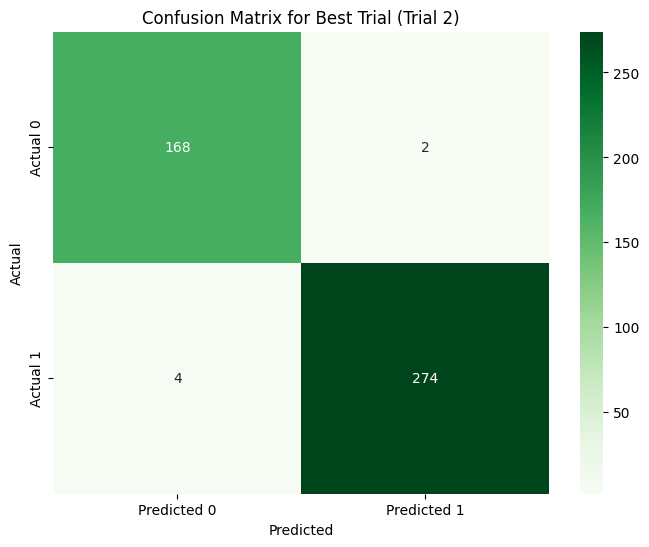

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan jumlah percobaan
num_trials = 10

# List untuk menyimpan hasil evaluasi dari setiap percobaan
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
confusion_matrices = []

# SMOTE untuk menangani data yang tidak seimbang
smote = SMOTE(random_state=42)

# Loop sebanyak num_trials
for trial in range(num_trials):
    print(f"Trial {trial + 1}/{num_trials}")

    # Split data menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=trial)

    # Oversampling menggunakan SMOTE pada data latih
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Inisialisasi model XGBoost dengan parameter terbaik (dari hasil tuning sebelumnya)
    best_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta': 0.2,
        'max_depth': 5,
        'n_estimators': 100,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'gamma': 0.1,
        'random_state': trial
    }
    model = xgb.XGBClassifier(**best_params)

    # Train model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict pada data uji
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Simpan hasil evaluasi
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Simpan confusion matrix
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}\n")

# Menentukan trial dengan F1-Score terbaik
best_trial_index = np.argmax(f1_scores)
best_confusion_matrix = confusion_matrices[best_trial_index]

# Menampilkan hasil rata-rata dan standar deviasi dari semua percobaan
print("\nSummary of all trials:")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Average ROC-AUC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")

# Menampilkan confusion matrix dari trial terbaik
print(f"\nBest trial index (based on F1-Score): {best_trial_index + 1}")
print("Confusion Matrix:")
print(best_confusion_matrix)

# Visualisasi confusion matrix terbaik
plt.figure(figsize=(8, 6))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for Best Trial (Trial {best_trial_index + 1})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
